In [127]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
pitching_path = 'baseball_pitching/data/'
hitting_path = 'baseball_hitting/data/'

# Data Exploration, Merging data

In [129]:
poi = pd.read_csv(pitching_path + 'poi/poi_metrics.csv')

In [130]:
metadata = pd.read_csv(pitching_path + 'metadata.csv')

In [131]:
poi.columns

Index(['session_pitch', 'session', 'p_throws', 'pitch_type', 'pitch_speed_mph',
       'max_shoulder_internal_rotational_velo', 'max_elbow_extension_velo',
       'max_torso_rotational_velo', 'max_rotation_hip_shoulder_separation',
       'max_elbow_flexion', 'max_shoulder_external_rotation',
       'elbow_flexion_fp', 'elbow_pronation_fp',
       'rotation_hip_shoulder_separation_fp',
       'shoulder_horizontal_abduction_fp', 'shoulder_abduction_fp',
       'shoulder_external_rotation_fp', 'lead_knee_extension_angular_velo_fp',
       'lead_knee_extension_angular_velo_br',
       'lead_knee_extension_angular_velo_max', 'torso_anterior_tilt_fp',
       'torso_lateral_tilt_fp', 'torso_rotation_fp', 'pelvis_anterior_tilt_fp',
       'pelvis_lateral_tilt_fp', 'pelvis_rotation_fp', 'max_cog_velo_x',
       'torso_rotation_min', 'max_pelvis_rotational_velo',
       'glove_shoulder_horizontal_abduction_fp', 'glove_shoulder_abduction_fp',
       'glove_shoulder_external_rotation_fp', 'glove_

In [132]:
metadata.columns

Index(['user', 'session', 'session_pitch', 'session_mass_kg',
       'session_height_m', 'age_yrs', 'playing_level', 'pitch_speed_mph',
       'filename_new', 'modelname_new'],
      dtype='object')

In [133]:
metadata.drop(columns=['user', 'session', 'pitch_speed_mph', 'filename_new', 'modelname_new'], axis=1, inplace=True)

In [134]:
poi_metadata = poi.merge(metadata, on='session_pitch', how='left')
poi_metadata

,session_pitch,session,p_throws,pitch_type,pitch_speed_mph,max_shoulder_internal_rotational_velo,max_elbow_extension_velo,max_torso_rotational_velo,max_rotation_hip_shoulder_separation,max_elbow_flexion,...,lead_grf_y_max,lead_grf_z_max,lead_grf_mag_max,lead_grf_angle_at_max,peak_rfd_rear,peak_rfd_lead,session_mass_kg,session_height_m,age_yrs,playing_level
0,1031_2,1031,R,FF,90.4,4533.2480,2445.8177,958.0878,32.3152,109.9971,...,270.7849,2484.8747,2782.9580,63.3501,11.6564,170.4620,110.6784,1.9304,21.40,college
1,1031_3,1031,R,FF,90.4,4571.1735,2389.5438,969.5766,32.5547,109.1065,...,252.1999,2690.7521,3038.8913,62.3087,9.5715,183.6636,110.6784,1.9304,21.40,college
2,1097_1,1097,R,FF,77.6,4165.3055,2426.3029,1090.2269,33.1477,123.4752,...,245.4411,1767.4604,2010.5341,61.5594,4.4432,52.9333,101.1528,1.9304,19.41,college
3,1097_2,1097,R,FF,77.0,3832.1715,2424.0493,1105.2275,27.9286,124.6578,...,280.5177,1715.1864,1864.0488,66.6789,6.4897,54.3727,101.1528,1.9304,19.41,college
4,1097_3,1097,R,FF,76.1,3970.7971,2497.6253,1110.4850,28.9909,124.8308,...,337.4227,2120.4510,2283.1749,65.9014,7.2019,106.2719,101.1528,1.9304,19.41,college
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,3252_1,3252,R,FF,80.8,4494.0446,2759.7142,1129.4168,42.9000,123.5448,...,141.5886,1685.4288,1891.2377,63.0494,6307.8100,72742.9029,88.4520,1.8796,20.38,college
407,3252_2,3252,R,FF,80.8,4550.4618,2742.8536,1129.4417,43.5008,123.5490,...,104.1382,1708.8564,1932.4776,61.7749,7850.2644,77906.1103,88.4520,1.8796,20.38,college
408,3252_3,3252,R,FF,80.8,4580.0385,2796.3719,1133.8676,43.7838,125.6560,...,86.2704,1647.5457,1858.1106,62.8667,16303.1697,77777.3331,88.4520,1.8796,20.38,college
409,3252_4,3252,R,FF,83.3,4638.4414,2815.9331,1119.5235,43.0352,127.5534,...,117.9198,1658.6645,1863.5780,63.3718,11758.9779,77382.0300,88.4520,1.8796,20.38,college


In [135]:
poi_metadata.p_throws = np.where(poi_metadata.p_throws == 'R', 1, 0)

In [136]:
level_encoding = {
    'high_school': 1,
    'college': 2,
    'independent': 3,
    'milb': 4
}
poi_metadata['playing_level'] = poi_metadata['playing_level'].replace(level_encoding)

In [139]:
poi_metadata.drop('pitch_type', axis=1, inplace=True)

In [140]:
poi_metadata.drop('session', axis=1, inplace=True)

<Axes: >

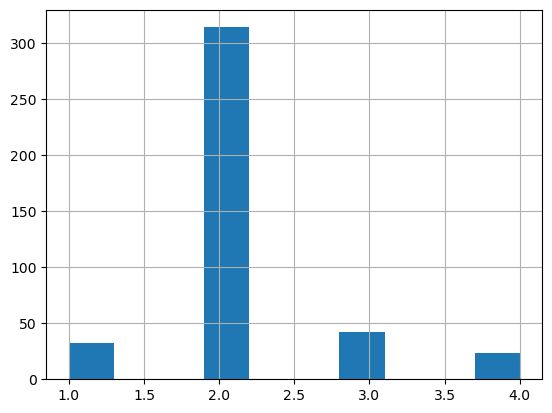

In [141]:
poi_metadata.playing_level.hist()

<Axes: >

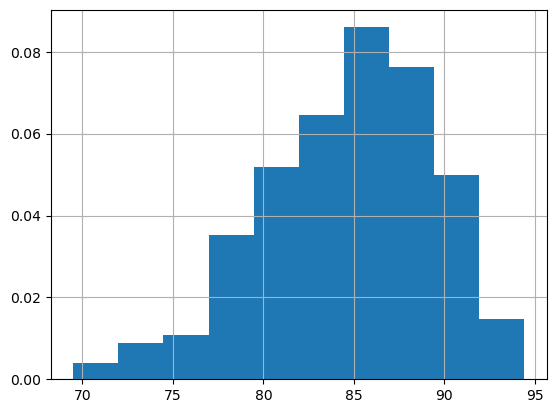

In [56]:
poi_metadata.pitch_speed_mph.hist(density=True)    

In [144]:
print(np.mean(poi_metadata.pitch_speed_mph[poi_metadata.playing_level==1]),np.mean(poi_metadata.pitch_speed_mph[poi_metadata.playing_level==2]),np.mean(poi_metadata.pitch_speed_mph[poi_metadata.playing_level==3]),np.mean(poi_metadata.pitch_speed_mph[poi_metadata.playing_level==4]))

79.515625 84.73375796178344 85.94285714285715 89.24782608695651


In [145]:
pitching_full_sig_path = pitching_path + 'full_sig/'
energy_flow = pd.read_csv(pitching_full_sig_path + 'energy_flow.csv')
force_plate = pd.read_csv(pitching_full_sig_path + 'force_plate.csv')
forces_moments = pd.read_csv(pitching_full_sig_path + 'forces_moments.csv')
joint_angles = pd.read_csv(pitching_full_sig_path + 'joint_angles.csv')
joint_velos = pd.read_csv(pitching_full_sig_path + 'joint_velos.csv')
landmarks = pd.read_csv(pitching_full_sig_path + 'landmarks.csv')

In [146]:
energy_flow.columns

Index(['session_pitch', 'time', 'rear_knee_energy_transfer_stp',
       'rear_knee_energy_transfer_jfp', 'rear_knee_energy_generated',
       'lead_knee_energy_transfer_stp', 'lead_knee_energy_transfer_jfp',
       'lead_knee_energy_generated', 'rear_hip_energy_transfer_stp',
       'rear_hip_energy_transfer_jfp', 'rear_hip_energy_generated',
       'lead_hip_energy_transfer_stp', 'lead_hip_energy_transfer_jfp',
       'lead_hip_energy_generated', 'elbow_energy_transfer_stp',
       'elbow_energy_transfer_jfp', 'elbow_energy_generated',
       'glove_elbow_energy_transfer_stp', 'glove_elbow_energy_transfer_jfp',
       'glove_elbow_energy_generated', 'shoulder_energy_transfer_stp',
       'shoulder_energy_transfer_jfp', 'shoulder_energy_generated',
       'glove_shoulder_energy_transfer_stp',
       'glove_shoulder_energy_transfer_jfp', 'glove_shoulder_energy_generated',
       'glove_upper_arm_dist_seg_pwr', 'glove_upper_arm_prox_seg_pwr',
       'glove_forearm_dist_seg_pwr', 'glove_f

In [147]:
force_plate.columns

Index(['session_pitch', 'time', 'rear_force_x', 'rear_force_y', 'rear_force_z',
       'lead_force_x', 'lead_force_y', 'lead_force_z', 'pkh_time',
       'fp_10_time', 'fp_100_time', 'MER_time', 'BR_time', 'MIR_time'],
      dtype='object')

In [148]:
forces_moments.columns

Index(['session_pitch', 'time', 'rear_ankle_moment_x', 'rear_ankle_moment_y',
       'rear_ankle_moment_z', 'elbow_moment_x', 'elbow_moment_y',
       'elbow_moment_z', 'rear_hip_rear_thigh_moment_x',
       'rear_hip_rear_thigh_moment_y',
       ...
       'glove_shoulder_thorax_force_z', 'glove_wrist_force_x',
       'glove_wrist_force_y', 'glove_wrist_force_z', 'pkh_time', 'fp_10_time',
       'fp_100_time', 'MER_time', 'BR_time', 'MIR_time'],
      dtype='object', length=104)

In [149]:
joint_angles.columns

Index(['session_pitch', 'time', 'rear_ankle_angle_x', 'rear_ankle_angle_y',
       'rear_ankle_angle_z', 'elbow_angle_x', 'elbow_angle_y', 'elbow_angle_z',
       'rear_hip_angle_x', 'rear_hip_angle_y', 'rear_hip_angle_z',
       'rear_knee_angle_x', 'rear_knee_angle_y', 'rear_knee_angle_z',
       'shoulder_angle_x', 'shoulder_angle_y', 'shoulder_angle_z',
       'wrist_angle_x', 'wrist_angle_y', 'wrist_angle_z', 'pelvis_angle_x',
       'pelvis_angle_y', 'pelvis_angle_z', 'lead_ankle_angle_x',
       'lead_ankle_angle_y', 'lead_ankle_angle_z', 'glove_elbow_angle_x',
       'glove_elbow_angle_y', 'glove_elbow_angle_z', 'lead_hip_angle_x',
       'lead_hip_angle_y', 'lead_hip_angle_z', 'lead_knee_angle_x',
       'lead_knee_angle_y', 'lead_knee_angle_z', 'glove_shoulder_angle_x',
       'glove_shoulder_angle_y', 'glove_shoulder_angle_z',
       'glove_wrist_angle_x', 'glove_wrist_angle_y', 'glove_wrist_angle_z',
       'torso_angle_x', 'torso_angle_y', 'torso_angle_z',
       'torso_pe

In [150]:
joint_velos.columns

Index(['session_pitch', 'time', 'elbow_velo_x', 'elbow_velo_y', 'elbow_velo_z',
       'rear_hip_velo_x', 'rear_hip_velo_y', 'rear_hip_velo_z',
       'rear_knee_velo_x', 'rear_knee_velo_y', 'rear_knee_velo_z',
       'shoulder_velo_x', 'shoulder_velo_y', 'shoulder_velo_z', 'wrist_velo_x',
       'wrist_velo_y', 'wrist_velo_z', 'pelvis_velo_x', 'pelvis_velo_y',
       'pelvis_velo_z', 'glove_elbow_velo_x', 'glove_elbow_velo_y',
       'glove_elbow_velo_z', 'lead_hip_velo_x', 'lead_hip_velo_y',
       'lead_hip_velo_z', 'lead_knee_velo_x', 'lead_knee_velo_y',
       'lead_knee_velo_z', 'glove_shoulder_velo_x', 'glove_shoulder_velo_y',
       'glove_shoulder_velo_z', 'glove_wrist_velo_x', 'glove_wrist_velo_y',
       'glove_wrist_velo_z', 'torso_velo_x', 'torso_velo_y', 'torso_velo_z',
       'torso_pelvis_velo_x', 'torso_pelvis_velo_y', 'torso_pelvis_velo_z',
       'pkh_time', 'fp_10_time', 'fp_100_time', 'MER_time', 'BR_time',
       'MIR_time'],
      dtype='object')

In [151]:
landmarks.columns

Index(['session_pitch', 'time', 'rear_ankle_jc_x', 'rear_ankle_jc_y',
       'rear_ankle_jc_z', 'rear_hip_x', 'rear_hip_y', 'rear_hip_z',
       'elbow_jc_x', 'elbow_jc_y', 'elbow_jc_z', 'hand_jc_x', 'hand_jc_y',
       'hand_jc_z', 'rear_knee_jc_x', 'rear_knee_jc_y', 'rear_knee_jc_z',
       'shoulder_jc_x', 'shoulder_jc_y', 'shoulder_jc_z', 'wrist_jc_x',
       'wrist_jc_y', 'wrist_jc_z', 'lead_ankle_jc_x', 'lead_ankle_jc_y',
       'lead_ankle_jc_z', 'lead_hip_x', 'lead_hip_y', 'lead_hip_z',
       'glove_elbow_jc_x', 'glove_elbow_jc_y', 'glove_elbow_jc_z',
       'glove_hand_jc_x', 'glove_hand_jc_y', 'glove_hand_jc_z',
       'lead_knee_jc_x', 'lead_knee_jc_y', 'lead_knee_jc_z',
       'glove_shoulder_jc_x', 'glove_shoulder_jc_y', 'glove_shoulder_jc_z',
       'glove_wrist_jc_x', 'glove_wrist_jc_y', 'glove_wrist_jc_z',
       'thorax_ap_x', 'thorax_ap_y', 'thorax_ap_z', 'thorax_dist_x',
       'thorax_dist_y', 'thorax_dist_z', 'thorax_prox_x', 'thorax_prox_y',
       'thorax_prox_z

In [152]:
print(len(poi_metadata),len(energy_flow),len(force_plate),len(forces_moments),len(joint_angles),len(joint_velos),len(landmarks))

411 247709 727824 247709 247709 247709 247709


In [155]:
columns = []
for col in force_plate.columns:
    if col in energy_flow.columns and col not in ['session_pitch','time']:
        columns.append(col)
# force_plate.drop(columns=columns, axis=1, inplace=True)
merged = energy_flow.merge(force_plate.drop(columns=columns, axis=1), on = ['session_pitch','time'], how='left')

In [156]:
columns = []
for col in forces_moments.columns:
    if col in merged.columns and col not in ['session_pitch','time']:
        columns.append(col)
# force_plate.drop(columns=columns, axis=1, inplace=True)
merged = merged.merge(forces_moments.drop(columns=columns, axis=1), on = ['session_pitch','time'], how='left')

In [157]:
columns = []
for col in joint_angles.columns:
    if col in merged.columns and col not in ['session_pitch','time']:
        columns.append(col)
# force_plate.drop(columns=columns, axis=1, inplace=True)
merged = merged.merge(joint_angles.drop(columns=columns, axis=1), on = ['session_pitch','time'], how='left')

In [158]:
columns = []
for col in joint_velos.columns:
    if col in merged.columns and col not in ['session_pitch','time']:
        columns.append(col)
# force_plate.drop(columns=columns, axis=1, inplace=True)
merged = merged.merge(joint_velos.drop(columns=columns, axis=1), on = ['session_pitch','time'], how='left')

In [159]:
columns = []
for col in landmarks.columns:
    if col in merged.columns and col not in ['session_pitch','time']:
        columns.append(col)
# force_plate.drop(columns=columns, axis=1, inplace=True)
merged = merged.merge(landmarks.drop(columns=columns, axis=1), on = ['session_pitch','time'], how='left')

In [160]:
merged

,session_pitch,time,rear_knee_energy_transfer_stp,rear_knee_energy_transfer_jfp,rear_knee_energy_generated,lead_knee_energy_transfer_stp,lead_knee_energy_transfer_jfp,lead_knee_energy_generated,rear_hip_energy_transfer_stp,rear_hip_energy_transfer_jfp,...,thorax_ap_z,thorax_dist_x,thorax_dist_y,thorax_dist_z,thorax_prox_x,thorax_prox_y,thorax_prox_z,centerofmass_x,centerofmass_y,centerofmass_z
0,1031_2,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.6123,0.1213,-0.1545,1.3509,0.1147,-0.1729,1.6184,0.1148,-0.1556,1.1440
1,1031_2,0.0028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.6124,0.1218,-0.1547,1.3510,0.1152,-0.1731,1.6184,0.1167,-0.1562,1.1458
2,1031_2,0.0056,45.3350,20.1973,-8.0818,17.7538,6.0121,44.9851,0.1649,19.1142,...,1.6125,0.1221,-0.1549,1.3511,0.1156,-0.1733,1.6184,0.1169,-0.1563,1.1459
3,1031_2,0.0083,38.2959,19.3669,-8.7513,14.0252,4.4715,34.3861,0.0000,18.4929,...,1.6126,0.1224,-0.1551,1.3512,0.1160,-0.1736,1.6185,0.1171,-0.1564,1.1459
4,1031_2,0.0111,31.5861,18.5402,-9.5193,10.4432,3.0432,24.3333,0.0000,17.8197,...,1.6127,0.1227,-0.1553,1.3512,0.1163,-0.1738,1.6186,0.1173,-0.1566,1.1460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247704,3252_5,1.7528,-65.5371,-174.4923,10.9729,-101.9002,25.9129,-321.7640,0.0000,-284.1946,...,1.2854,1.5113,-0.0011,1.1167,1.6018,0.1272,1.2994,1.4461,-0.0296,0.9630
247705,3252_5,1.7556,-57.7275,-163.6167,9.1722,-101.9734,26.6900,-320.3218,0.0000,-277.5526,...,1.2879,1.5129,0.0010,1.1187,1.6033,0.1291,1.3020,1.4480,-0.0290,0.9657
247706,3252_5,1.7583,-53.0746,-157.1646,8.0998,-102.0185,27.1232,-319.4924,0.0000,-273.6412,...,1.2901,1.5144,0.0030,1.1206,1.6048,0.1308,1.3044,1.4500,-0.0285,0.9682
247707,3252_5,1.7611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2920,1.5159,0.0049,1.1222,1.6063,0.1323,1.3065,1.4520,-0.0279,0.9703


In [161]:
for col in merged.columns:
    if col in poi_metadata.columns:
        print(col)

session_pitch


In [162]:
all_merged = poi_metadata.merge(merged.drop(columns=columns, axis=1), on = 'session_pitch', how='left')

In [163]:
all_merged

,session_pitch,p_throws,pitch_speed_mph,max_shoulder_internal_rotational_velo,max_elbow_extension_velo,max_torso_rotational_velo,max_rotation_hip_shoulder_separation,max_elbow_flexion,max_shoulder_external_rotation,elbow_flexion_fp,...,thorax_ap_z,thorax_dist_x,thorax_dist_y,thorax_dist_z,thorax_prox_x,thorax_prox_y,thorax_prox_z,centerofmass_x,centerofmass_y,centerofmass_z
0,1031_2,1,90.4,4533.2480,2445.8177,958.0878,32.3152,109.9971,162.3480,86.3476,...,1.6123,0.1213,-0.1545,1.3509,0.1147,-0.1729,1.6184,0.1148,-0.1556,1.1440
1,1031_2,1,90.4,4533.2480,2445.8177,958.0878,32.3152,109.9971,162.3480,86.3476,...,1.6124,0.1218,-0.1547,1.3510,0.1152,-0.1731,1.6184,0.1167,-0.1562,1.1458
2,1031_2,1,90.4,4533.2480,2445.8177,958.0878,32.3152,109.9971,162.3480,86.3476,...,1.6125,0.1221,-0.1549,1.3511,0.1156,-0.1733,1.6184,0.1169,-0.1563,1.1459
3,1031_2,1,90.4,4533.2480,2445.8177,958.0878,32.3152,109.9971,162.3480,86.3476,...,1.6126,0.1224,-0.1551,1.3512,0.1160,-0.1736,1.6185,0.1171,-0.1564,1.1459
4,1031_2,1,90.4,4533.2480,2445.8177,958.0878,32.3152,109.9971,162.3480,86.3476,...,1.6127,0.1227,-0.1553,1.3512,0.1163,-0.1738,1.6186,0.1173,-0.1566,1.1460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247704,3252_5,1,81.2,4585.8845,2814.0260,1099.2458,41.8970,127.1583,167.9611,120.2441,...,1.2854,1.5113,-0.0011,1.1167,1.6018,0.1272,1.2994,1.4461,-0.0296,0.9630
247705,3252_5,1,81.2,4585.8845,2814.0260,1099.2458,41.8970,127.1583,167.9611,120.2441,...,1.2879,1.5129,0.0010,1.1187,1.6033,0.1291,1.3020,1.4480,-0.0290,0.9657
247706,3252_5,1,81.2,4585.8845,2814.0260,1099.2458,41.8970,127.1583,167.9611,120.2441,...,1.2901,1.5144,0.0030,1.1206,1.6048,0.1308,1.3044,1.4500,-0.0285,0.9682
247707,3252_5,1,81.2,4585.8845,2814.0260,1099.2458,41.8970,127.1583,167.9611,120.2441,...,1.2920,1.5159,0.0049,1.1222,1.6063,0.1323,1.3065,1.4520,-0.0279,0.9703


In [165]:
max_time_per_session = all_merged.groupby('session_pitch')['time'].max().reset_index()

# Merge this information back into poi_metadata
poi_metadata = pd.merge(poi_metadata, max_time_per_session, on='session_pitch', how='left')

# Rename the new column to 'total_time'
poi_metadata.rename(columns={'time': 'total_time'}, inplace=True)
poi_metadata.total_time

0      1.5250
1      1.0167
2      1.1944
3      1.2361
4      1.2361
        ...  
406    2.0722
407    1.8139
408    1.8778
409    1.6500
410    1.7639
Name: total_time, Length: 411, dtype: float64

In [166]:
all_merged['order'] = all_merged.groupby('session_pitch').cumcount() + 1
all_merged.order

0           1
1           2
2           3
3           4
4           5
         ... 
247704    632
247705    633
247706    634
247707    635
247708    636
Name: order, Length: 247709, dtype: int64

# POI-Metadata

In [167]:
poi_metadata.columns

Index(['session_pitch', 'p_throws', 'pitch_speed_mph',
       'max_shoulder_internal_rotational_velo', 'max_elbow_extension_velo',
       'max_torso_rotational_velo', 'max_rotation_hip_shoulder_separation',
       'max_elbow_flexion', 'max_shoulder_external_rotation',
       'elbow_flexion_fp', 'elbow_pronation_fp',
       'rotation_hip_shoulder_separation_fp',
       'shoulder_horizontal_abduction_fp', 'shoulder_abduction_fp',
       'shoulder_external_rotation_fp', 'lead_knee_extension_angular_velo_fp',
       'lead_knee_extension_angular_velo_br',
       'lead_knee_extension_angular_velo_max', 'torso_anterior_tilt_fp',
       'torso_lateral_tilt_fp', 'torso_rotation_fp', 'pelvis_anterior_tilt_fp',
       'pelvis_lateral_tilt_fp', 'pelvis_rotation_fp', 'max_cog_velo_x',
       'torso_rotation_min', 'max_pelvis_rotational_velo',
       'glove_shoulder_horizontal_abduction_fp', 'glove_shoulder_abduction_fp',
       'glove_shoulder_external_rotation_fp', 'glove_shoulder_abduction_mer',


In [170]:
from sklearn.linear_model import LinearRegression

In [177]:
poi_metadata[poi_metadata.isna().any(axis=1)]

,session_pitch,p_throws,pitch_speed_mph,max_shoulder_internal_rotational_velo,max_elbow_extension_velo,max_torso_rotational_velo,max_rotation_hip_shoulder_separation,max_elbow_flexion,max_shoulder_external_rotation,elbow_flexion_fp,...,lead_grf_z_max,lead_grf_mag_max,lead_grf_angle_at_max,peak_rfd_rear,peak_rfd_lead,session_mass_kg,session_height_m,age_yrs,playing_level,total_time
15,1370_1,1,87.8,4378.9195,2233.9898,1152.4505,28.4991,106.6919,156.3049,95.9804,...,NaN,NaN,NaN,NaN,NaN,104.3280,1.9050,23.43,3,1.2444
191,2857_4,1,72.9,4815.1804,2386.8824,877.5712,40.6763,96.2136,165.2810,52.6094,...,NaN,NaN,NaN,NaN,NaN,69.4008,1.8542,18.85,2,1.6222
247,2919_2,1,82.6,4924.3223,2775.5162,951.6221,28.8214,132.7934,182.2818,90.9193,...,NaN,NaN,NaN,NaN,NaN,84.8232,1.9050,18.80,2,1.8694
248,2919_3,1,84.0,4812.6796,2720.4570,985.4787,29.6014,134.5015,184.0617,93.9795,...,NaN,NaN,NaN,NaN,NaN,84.8232,1.9050,18.80,2,2.2500
249,2919_4,1,82.6,4847.2724,2766.5142,954.6934,28.7634,134.0515,183.6061,92.7248,...,NaN,NaN,NaN,NaN,NaN,84.8232,1.9050,18.80,2,1.9778
250,2919_5,1,82.6,4991.7229,2821.7158,953.1706,28.0776,132.8751,184.1284,93.9730,...,NaN,NaN,NaN,NaN,NaN,84.8232,1.9050,18.80,2,1.8667
251,2923_1,1,78.9,4250.3573,2077.3878,1062.1852,21.4589,101.8802,151.2197,91.0276,...,NaN,NaN,NaN,NaN,NaN,73.4832,1.7780,20.09,2,1.5056
252,2923_2,1,76.4,4292.0506,2071.5214,1088.3251,22.0308,100.8572,152.0982,91.2621,...,NaN,NaN,NaN,NaN,NaN,73.4832,1.7780,20.09,2,1.8111


In [178]:
poi_metadata.dropna(inplace=True)

In [186]:
y = poi_metadata.pitch_speed_mph
x = poi_metadata.drop(['pitch_speed_mph', 'session_pitch', 'total_time'], axis=1)

In [187]:
linear_model = LinearRegression().fit(x,y)
linear_model.score(x,y)

0.9069601115600809

In [188]:
linear_model.coef_

array([-1.56524501e+00,  1.02337639e-03, -2.85036454e-04,  2.07691652e-02,
       -9.13768397e-03,  1.34395172e-01,  6.59639113e-02, -3.47124699e-02,
        2.64727932e-03,  1.49119776e-02,  8.03809284e-02,  5.38118591e-02,
       -5.18265243e-02, -1.34181407e-03,  2.72990116e-03, -1.45110892e-03,
        1.36922692e-01, -1.02584565e-01,  1.68147592e-01,  1.16823389e-01,
       -9.60194657e-03,  4.90417146e-02,  1.45638329e+00, -1.65873692e-02,
       -2.26461481e-04, -2.22867022e-02,  5.72894719e-02, -3.19834200e-02,
       -3.94312955e-02, -1.18475183e-02,  3.27357237e-02,  6.47068044e-01,
       -5.62637149e-02, -1.58119186e-01,  1.88694226e-01, -4.95622763e-02,
       -3.70499560e-01, -2.72716042e-01,  4.61668969e-02, -1.86332652e+00,
        1.04061346e-01, -1.10607034e-01, -9.04386773e-02, -5.35275672e+00,
       -2.37606665e-02, -1.55916152e-02, -7.53905590e-03, -3.74474570e-02,
        3.44408072e-02,  1.11009340e-01, -7.06996872e-03, -2.85496228e-02,
       -1.11423061e-02,  

In [189]:
x = poi_metadata.drop(['pitch_speed_mph', 'session_pitch'], axis=1)
linear_model = LinearRegression().fit(x,y)
linear_model.score(x,y)

0.908236300183582

In [190]:
linear_model.coef_

array([-1.48533044e+00,  9.39205559e-04, -3.86347466e-06,  2.00221020e-02,
       -9.85321810e-03,  1.24098433e-01,  6.98972459e-02, -2.97207523e-02,
        2.70385272e-04,  2.26815547e-02,  8.10792402e-02,  5.90511439e-02,
       -5.40600812e-02, -1.46652746e-03,  2.74653027e-03, -1.18898675e-03,
        1.46201003e-01, -9.25087704e-02,  1.82704430e-01,  1.19849164e-01,
       -1.72214155e-02,  3.98688348e-02,  1.72679724e+00, -2.50046283e-02,
        2.72513081e-04, -2.78635656e-02,  6.03082413e-02, -3.38986312e-02,
       -4.50662519e-02, -2.30416724e-02,  2.10857563e-02,  6.79189315e-01,
       -4.64810263e-02, -1.49603932e-01,  1.80341009e-01, -4.51141540e-02,
       -3.89303476e-01, -2.86206896e-01,  5.06127123e-02, -2.37620194e+00,
       -4.36184118e-01, -1.07520733e-01, -9.23532754e-02, -6.28497409e+00,
       -2.75799560e-02,  1.73585496e-02, -4.27937920e-03, -1.17884933e-02,
        3.46460290e-02,  1.11525073e-01, -9.59521861e-03, -2.91706645e-02,
       -1.19479895e-02,  

In [201]:
coef_df = pd.DataFrame({
    'feature': x.columns,
    'coefficient': linear_model.coef_
})
coef_df

,feature,coefficient
0,p_throws,-1.485330
1,max_shoulder_internal_rotational_velo,0.000939
2,max_elbow_extension_velo,-0.000004
3,max_torso_rotational_velo,0.020022
4,max_rotation_hip_shoulder_separation,-0.009853
...,...,...
77,session_mass_kg,-0.096548
78,session_height_m,11.193879
79,age_yrs,0.047874
80,playing_level,0.890071


In [214]:
from scipy import stats
import statsmodels.api as sm

In [243]:
model = sm.OLS(y, x)
result = model.fit()

In [253]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        pitch_speed_mph   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.391e+04
Date:                Sun, 10 Sep 2023   Prob (F-statistic):                        0.00
Time:                        20:43:41   Log-Likelihood:                         -714.27
No. Observations:                 403   AIC:                                      1593.
Df Residuals:                     321   BIC:                                      1920.
Df Model:                          82                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
p_throws                                     -1.4789      0.428     -3.456      0.001      -2.321      -0.637
max_shoulder_internal_rotational_velo         0.0010      0.001      1.671      0.096      -0.000       0.002
max_elbow_extension_velo                  -4.272e-05      0.001     -0.037      0.970      -0.002       0.002
max_torso_rotational_velo                     0.0211      0.003      7.916      0.000       0.016       0.026
max_rotation_hip_shoulder_separation         -0.0139      0.068     -0.203      0.840      -0.149       0.121
max_elbow_flexion                             0.1293      0.034      3.841      0.000       0.063       0.195
max_shoulder_external_rotation                0.0823      0.023      3.627      0.000       0.038       0.127
elbow_flexion_fp                             -0.0264      0.017     -1.571      0.117      -0.059       0.007
elbow_pronation_fp                           -0.0004      0.008     -0.045      0.964      -0.016       0.015
rotation_hip_shoulder_separation_fp           0.0083      0.121      0.069      0.945      -0.229       0.246
shoulder_horizontal_abduction_fp              0.0772      0.026      3.011      0.003       0.027       0.128
shoulder_abduction_fp                         0.0661      0.022      3.003      0.003       0.023       0.109
shoulder_external_rotation_fp                -0.0528      0.012     -4.296      0.000      -0.077      -0.029
lead_knee_extension_angular_velo_fp          -0.0015      0.001     -1.580      0.115      -0.003       0.000
lead_knee_extension_angular_velo_br           0.0031      0.001      2.155      0.032       0.000       0.006
lead_knee_extension_angular_velo_max         -0.0015      0.002     -0.897      0.371      -0.005       0.002
torso_anterior_tilt_fp                        0.1420      0.032      4.433      0.000       0.079       0.205
torso_lateral_tilt_fp                        -0.0957      0.037     -2.562      0.011      -0.169      -0.022
torso_rotation_fp                             0.1616      0.130      1.247      0.213      -0.093       0.417
pelvis_anterior_tilt_fp                       0.1204      0.022      5.489      0.000       0.077       0.164
pelvis_lateral_tilt_fp                       -0.0102      0.041     -0.248      0.804      -0.091       0.071
pelvis_rotation_fp                            0.0568      0.131      0.435      0.664      -0.200       0.314
max_cog_velo_x                                1.7324      0.987      1.755      0.080      -0.210       3.674
torso_rotation_min                           -0.0217      0.015     -1.413      0.159      -0.052       0.009
max_pelvis_rot

In [234]:
summary_as_html = result.summary().tables[1].as_html()
coef_df = pd.read_html(summary_as_html, header=0, index_col=0)[0]

coef_df = coef_df.reset_index().rename(columns={'index': 'feature', 'coef': 'coefficient', 'std err': 'SE', 'P>|t|': 'p_value'})

In [235]:
coef_df

,feature,coefficient,SE,t,p_value,[0.025,0.975]
0,p_throws,-1.478900,0.428,-3.456,0.001,-2.321,-0.637
1,max_shoulder_internal_rotational_velo,0.001000,0.001,1.671,0.096,-0.000,0.002
2,max_elbow_extension_velo,-0.000043,0.001,-0.037,0.970,-0.002,0.002
3,max_torso_rotational_velo,0.021100,0.003,7.916,0.000,0.016,0.026
4,max_rotation_hip_shoulder_separation,-0.013900,0.068,-0.203,0.840,-0.149,0.121
...,...,...,...,...,...,...,...
77,session_mass_kg,-0.090500,0.034,-2.674,0.008,-0.157,-0.024
78,session_height_m,12.978500,2.311,5.616,0.000,8.432,17.525
79,age_yrs,0.059500,0.084,0.710,0.478,-0.105,0.224
80,playing_level,0.822600,0.304,2.702,0.007,0.224,1.421


In [236]:
insig_features = coef_df.feature[coef_df.p_value>.1]

In [237]:
sig_features = coef_df.feature[coef_df.p_value<.1]

In [238]:
len(sig_features)

44

In [239]:
len(insig_features)

38

In [240]:
reduced_x = poi_metadata[sig_features]

In [244]:
reduced_model = sm.OLS(y, reduced_x)
reduced_result = reduced_model.fit()

In [245]:
reduced_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        pitch_speed_mph   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.818e+04
Date:                Sun, 10 Sep 2023   Prob (F-statistic):                        0.00
Time:                        20:12:00   Log-Likelihood:                         -808.34
No. Observations:                 403   AIC:                                      1705.
Df Residuals:                     359   BIC:                                      1881.
Df Model:                          44                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
p_throws                                  -2.0274      0.400     -5.069      0.000      -2.814      -1.241
max_shoulder_internal_rotational_velo      0.0022      0.000      5.227      0.000       0.001       0.003
max_torso_rotational_velo                  0.0084      0.002      4.764      0.000       0.005       0.012
max_elbow_flexion                          0.0614      0.017      3.615      0.000       0.028       0.095
max_shoulder_external_rotation             0.0912      0.017      5.221      0.000       0.057       0.126
shoulder_horizontal_abduction_fp           0.0714      0.014      5.096      0.000       0.044       0.099
shoulder_abduction_fp                      0.0173      0.015      1.160      0.247      -0.012       0.047
shoulder_external_rotation_fp              0.0009      0.009      0.102      0.919      -0.016       0.018
lead_knee_extension_angular_velo_br        0.0032      0.001      3.105      0.002       0.001       0.005
torso_anterior_tilt_fp                    -0.0274      0.020     -1.373      0.171      -0.067       0.012
torso_lateral_tilt_fp                     -0.0760      0.023     -3.234      0.001      -0.122      -0.030
pelvis_anterior_tilt_fp                    0.1106      0.021      5.372      0.000       0.070       0.151
max_cog_velo_x                             1.6936      0.657      2.579      0.010       0.402       2.985
glove_shoulder_horizontal_abduction_fp    -0.0225      0.010     -2.199      0.029      -0.043      -0.002
glove_shoulder_abduction_fp                0.0153      0.017      0.919      0.359      -0.017       0.048
glove_shoulder_external_rotation_fp       -0.0095      0.008     -1.170      0.243      -0.025       0.006
glove_shoulder_abduction_mer              -0.0307      0.016     -1.890      0.060      -0.063       0.001
torso_lateral_tilt_mer                     0.2384      0.062      3.871      0.000       0.117       0.360
elbow_varus_moment                        -0.1625      0.038     -4.321      0.000      -0.237      -0.089
shoulder_internal_rotation_moment          0.2304      0.040      5.765      0.000       0.152       0.309
torso_lateral_tilt_br                     -0.0919      0.061     -1.496      0.136      -0.213       0.029
torso_rotation_br                         -0.1173      0.024     -4.929      0.000      -0.164      -0.071
lead_knee_extension_from_fp_to_br         -0.0008      0.019     -0.045      0.964      -0.038       0.036
stride_angle                              -0.1515      0.034     -4.392      0.000      -0.219      -0.084
arm_slot                                  -0.1264      0.024     -5.240      0.000      -0.174 

In [248]:
reduced_summary_as_html = reduced_result.summary().tables[1].as_html()
reduced_coef_df = pd.read_html(reduced_summary_as_html, header=0, index_col=0)[0]

reduced_coef_df = reduced_coef_df.reset_index().rename(columns={'index': 'feature', 'coef': 'coefficient', 'std err': 'SE', 'P>|t|': 'p_value'})

In [249]:
reduced_coef_df

,feature,coefficient,SE,t,p_value,[0.025,0.975]
0,p_throws,-2.0274,0.400,-5.069,0.000,-2.814,-1.241
1,max_shoulder_internal_rotational_velo,0.0022,0.000,5.227,0.000,0.001,0.003
2,max_torso_rotational_velo,0.0084,0.002,4.764,0.000,0.005,0.012
3,max_elbow_flexion,0.0614,0.017,3.615,0.000,0.028,0.095
4,max_shoulder_external_rotation,0.0912,0.017,5.221,0.000,0.057,0.126
5,shoulder_horizontal_abduction_fp,0.0714,0.014,5.096,0.000,0.044,0.099
6,shoulder_abduction_fp,0.0173,0.015,1.160,0.247,-0.012,0.047
7,shoulder_external_rotation_fp,0.0009,0.009,0.102,0.919,-0.016,0.018
8,lead_knee_extension_angular_velo_br,0.0032,0.001,3.105,0.002,0.001,0.005
9,torso_anterior_tilt_fp,-0.0274,0.020,-1.373,0.171,-0.067,0.012


In [254]:
corr_matrix = x.corr()

# Create a DataFrame to store highly correlated pairs
high_corr_pairs = []

# Iterate through the correlation matrix to find highly correlated pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.75:  # assuming a threshold of 0.75 for high correlation
            colname = corr_matrix.columns[i] + '_' + corr_matrix.columns[j]  # Name of the new interaction column
            x[colname] = x[corr_matrix.columns[i]] * x[corr_matrix.columns[j]]
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature1', 'Feature2', 'Correlation'])
high_corr_df

,Feature1,Feature2,Correlation
0,elbow_flexion_fp,max_elbow_flexion,0.792240
1,rotation_hip_shoulder_separation_fp,max_rotation_hip_shoulder_separation,0.910439
2,lead_knee_extension_angular_velo_max,lead_knee_extension_angular_velo_br,0.824889
3,pelvis_rotation_fp,torso_rotation_fp,0.840839
4,shoulder_internal_rotation_moment,elbow_varus_moment,0.978517
5,torso_anterior_tilt_br,torso_anterior_tilt_mer,0.936203
6,torso_lateral_tilt_br,torso_lateral_tilt_mer,0.921563
7,torso_rotation_br,torso_rotation_mer,0.891858
8,max_shoulder_horizontal_abduction,shoulder_horizontal_abduction_fp,0.814333
9,elbow_transfer_fp_br,shoulder_transfer_fp_br,0.957390


In [255]:
for terms in high_corr_df.itertuples():
    inter_column = poi_metadata[terms.Feature1] * poi_metadata[terms.Feature2]
    poi_metadata[terms.Feature1 + '_' + terms.Feature2] = inter_column

In [256]:
poi_metadata.columns

Index(['session_pitch', 'p_throws', 'pitch_speed_mph',
       'max_shoulder_internal_rotational_velo', 'max_elbow_extension_velo',
       'max_torso_rotational_velo', 'max_rotation_hip_shoulder_separation',
       'max_elbow_flexion', 'max_shoulder_external_rotation',
       'elbow_flexion_fp',
       ...
       'max_shoulder_horizontal_abduction_shoulder_horizontal_abduction_fp',
       'elbow_transfer_fp_br_shoulder_transfer_fp_br',
       'rear_knee_generation_pkh_fp_rear_hip_transfer_pkh_fp',
       'thorax_distal_transfer_fp_br_shoulder_transfer_fp_br',
       'thorax_distal_transfer_fp_br_elbow_transfer_fp_br',
       'rear_grf_mag_max_rear_grf_x_max', 'rear_grf_mag_max_rear_grf_z_max',
       'lead_grf_mag_max_lead_grf_x_max', 'lead_grf_mag_max_lead_grf_z_max',
       'peak_rfd_lead_peak_rfd_rear'],
      dtype='object', length=102)

In [257]:
x = poi_metadata.drop(['pitch_speed_mph', 'session_pitch'], axis=1)

In [258]:
inter_model = sm.OLS(y, x)
inter_result = inter_model.fit()

In [259]:
inter_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        pitch_speed_mph   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.457e+04
Date:                Sun, 10 Sep 2023   Prob (F-statistic):                        0.00
Time:                        21:32:17   Log-Likelihood:                         -653.39
No. Observations:                 403   AIC:                                      1507.
Df Residuals:                     303   BIC:                                      1907.
Df Model:                         100                                                  
Covariance Type:            nonrobust                                                  
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
p_throws                                                                    -1.6204      0.400     -4.049      0.000      -2.408      -0.833
max_shoulder_internal_rotational_velo                                        0.0003      0.001      0.500      0.617      -0.001       0.001
max_elbow_extension_velo                                                     0.0022      0.001      1.984      0.048    1.82e-05       0.004
max_torso_rotational_velo                                                    0.0129      0.003      4.689      0.000       0.008       0.018
max_rotation_hip_shoulder_separation                                         0.3223      0.101      3.196      0.002       0.124       0.521
max_elbow_flexion                                                            0.2390      0.107      2.233      0.026       0.028       0.450
max_shoulder_external_rotation                                               0.1291      0.023      5.538      0.000       0.083       0.175
elbow_flexion_fp                                                             0.1323      0.109      1.218      0.224      -0.081       0.346
elbow_pronation_fp                                                          -0.0197      0.008     -2.405      0.017      -0.036      -0.004
rotation_hip_shoulder_separation_fp                                          0.0543      0.146      0.371      0.711      -0.234       0.342
shoulder_horizontal_abduction_fp                                             0.1525      0.043      3.575      0.000       0.069       0.236
shoulder_abduction_fp                                                        0.0166      0.022      0.760      0.448      -0.026       0.059
shoulder_external_rotation_fp                                               -0.0488      0.012     -4.122      0.000      -0.072      -0.026
lead_knee_extension_angular_velo_fp                                         -0.0023      0.001     -2.507      0.013      -0.004      -0.000
lead_knee_extension_angular_velo_br                                          0.0003      0.002      0.115      0.909      -0.004       0.005
lead_knee_extension_angular_velo_max                                         0.0011      0.002      0.590      0.556      -0.003       0.005
torso_anterior_tilt_fp                                                       0.0277      0.035      0.803      0.422      -0.040       0.096
torso_lateral_tilt_fp                                                       -0.1366      0.040     -3.407      0.001      -0.215      -0.058
torso_rotation_fp      

In [262]:
summary_as_html = inter_result.summary().tables[1].as_html()
inter_coef_df = pd.read_html(summary_as_html, header=0, index_col=0)[0]

inter_coef_df = inter_coef_df.reset_index().rename(columns={'index': 'feature', 'coef': 'coefficient', 'std err': 'SE', 'P>|t|': 'p_value'})
sig_features = inter_coef_df.feature[inter_coef_df.p_value<.1]
sig_features

0                                              p_throws
2                              max_elbow_extension_velo
3                             max_torso_rotational_velo
4                  max_rotation_hip_shoulder_separation
5                                     max_elbow_flexion
6                        max_shoulder_external_rotation
8                                    elbow_pronation_fp
10                     shoulder_horizontal_abduction_fp
12                        shoulder_external_rotation_fp
13                  lead_knee_extension_angular_velo_fp
17                                torso_lateral_tilt_fp
19                              pelvis_anterior_tilt_fp
25               glove_shoulder_horizontal_abduction_fp
26                          glove_shoulder_abduction_fp
27                  glove_shoulder_external_rotation_fp
28                         glove_shoulder_abduction_mer
29                                    elbow_flexion_mer
30                              torso_anterior_t

In [263]:
len(sig_features)

49

In [264]:
reduced_x = poi_metadata[sig_features]
reduced_model = sm.OLS(y, reduced_x)
reduced_result = reduced_model.fit()
reduced_summary_as_html = reduced_result.summary().tables[1].as_html()
reduced_coef_df = pd.read_html(reduced_summary_as_html, header=0, index_col=0)[0]

reduced_coef_df = reduced_coef_df.reset_index().rename(columns={'index': 'feature', 'coef': 'coefficient', 'std err': 'SE', 'P>|t|': 'p_value'})

In [265]:
reduced_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        pitch_speed_mph   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.798e+04
Date:                Sun, 10 Sep 2023   Prob (F-statistic):                        0.00
Time:                        21:42:11   Log-Likelihood:                         -786.03
No. Observations:                 403   AIC:                                      1670.
Df Residuals:                     354   BIC:                                      1866.
Df Model:                          49                                                  
Covariance Type:            nonrobust                                                  
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
p_throws                                                                    -1.7883      0.389     -4.603      0.000      -2.552      -1.024
max_elbow_extension_velo                                                     0.0023      0.001      3.521      0.000       0.001       0.004
max_torso_rotational_velo                                                    0.0078      0.002      4.327      0.000       0.004       0.011
max_rotation_hip_shoulder_separation                                         0.4213      0.091      4.638      0.000       0.243       0.600
max_elbow_flexion                                                           -0.0183      0.018     -1.036      0.301      -0.053       0.016
max_shoulder_external_rotation                                               0.1427      0.018      7.719      0.000       0.106       0.179
elbow_pronation_fp                                                          -0.0140      0.007     -1.974      0.049      -0.028   -5.29e-05
shoulder_horizontal_abduction_fp                                             0.2939      0.033      8.873      0.000       0.229       0.359
shoulder_external_rotation_fp                                                0.0264      0.008      3.171      0.002       0.010       0.043
lead_knee_extension_angular_velo_fp                                         -0.0021      0.001     -2.979      0.003      -0.003      -0.001
torso_lateral_tilt_fp                                                       -0.0463      0.026     -1.767      0.078      -0.098       0.005
pelvis_anterior_tilt_fp                                                      0.1014      0.021      4.923      0.000       0.061       0.142
glove_shoulder_horizontal_abduction_fp                                      -0.0189      0.010     -1.810      0.071      -0.039       0.002
glove_shoulder_abduction_fp                                                  0.0693      0.016      4.336      0.000       0.038       0.101
glove_shoulder_external_rotation_fp                                         -0.0201      0.008     -2.570      0.011      -0.035      -0.005
glove_shoulder_abduction_mer                                                -0.0467      0.015     -3.096      0.002      -0.076      -0.017
elbow_flexion_mer                                                            0.0397      0.022      1.773      0.077      -0.004       0.084
torso_anterior_tilt_mer                                                      0.1767      0.052      3.429      0.001       0.075       0.278
torso_lateral_tilt_mer 